In [1]:
import pandas as pd
import numpy as np

In [2]:
AG = pd.read_csv("ARIMA+GARCH_preds_3months.csv")  
AG.head()

,Unnamed: 0,timestamp,NKE real value,NKE prediction,JPM real value,JPM prediction,SBUX real value,SBUX prediction,BRK-B real value,BRK-B prediction,RRC real value,RRC prediction,CAR real value,CAR prediction,COST real value,COST prediction
0,0,2019-01-02,74.06,74.190105,99.31,97.644929,64.32,64.422021,202.80,203.158976,9.96,9.624571,22.71,22.840629,204.76,204.986283
1,1,2019-01-03,72.75,74.240245,97.11,97.669864,61.53,64.444050,191.66,202.143059,9.95,9.679453,21.78,23.207044,200.42,206.270561
2,2,2019-01-04,74.65,74.290418,100.69,97.694806,63.57,64.466087,195.20,201.132221,10.69,9.734648,23.13,23.579337,206.24,207.562886
3,3,2019-01-07,75.72,74.340625,100.76,97.719754,63.57,64.488131,196.91,200.126438,11.13,9.790157,23.93,23.957602,207.00,208.863308
4,4,2019-01-08,76.73,74.390866,100.57,97.744709,63.62,64.510182,196.31,199.125685,11.00,9.845984,24.11,24.341935,208.55,210.171877


In [3]:
AG = AG.loc[:,['timestamp','NKE prediction','JPM prediction','SBUX prediction','BRK-B prediction','RRC prediction','CAR prediction','COST prediction'] ] 
AG.columns = ['time','NKE','JPM','SBUX','BRK-B','RRC','CAR','COST']
AG.tail()

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
56,2019-03-25,86.473694,104.927067,70.980021,202.221596,10.749910,36.053690,220.378336
57,2019-03-26,86.517641,104.960520,71.022604,202.275939,10.752853,36.067484,220.475090
58,2019-03-27,86.561610,104.993983,71.065213,202.330296,10.755797,36.081283,220.571886
59,2019-03-28,86.605602,105.027457,71.107847,202.384668,10.758741,36.095087,220.668725
60,2019-03-29,86.649616,105.060942,71.150507,202.439055,10.761687,36.108897,220.765607


In [4]:
RF = pd.read_csv("RF_pred.csv")  
RF = RF.loc[:,['time','NKE','JPM','SBUX','BRK-B','RRC','CAR','COST'] ] 
RF.tail()

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
55,2019-03-22,85.131633,101.83852,70.538480,196.74032,10.504792,32.032267,214.50664
56,2019-03-25,84.650633,101.42204,70.466860,197.24152,11.117280,32.393067,213.60504
57,2019-03-26,84.234600,102.05292,70.231033,197.10524,10.632744,33.434900,211.70868
58,2019-03-27,83.930500,102.02292,70.284030,197.67156,10.489452,35.804400,211.42104
59,2019-03-28,84.196300,101.74760,70.396560,197.09716,10.621060,36.249000,212.73092


In [5]:
RF2 = pd.DataFrame([['2019-03-29', 84.196300,101.74760,70.396560,197.09716,10.621060,36.249000,212.73092]], columns=['time','NKE','JPM','SBUX','BRK-B','RRC','CAR','COST'])
RF2

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
0,2019-03-29,84.1963,101.7476,70.39656,197.09716,10.62106,36.249,212.73092


In [6]:
RF3 = RF.append(RF2, ignore_index=True)
RF3.tail()

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
56,2019-03-25,84.650633,101.42204,70.466860,197.24152,11.117280,32.393067,213.60504
57,2019-03-26,84.234600,102.05292,70.231033,197.10524,10.632744,33.434900,211.70868
58,2019-03-27,83.930500,102.02292,70.284030,197.67156,10.489452,35.804400,211.42104
59,2019-03-28,84.196300,101.74760,70.396560,197.09716,10.621060,36.249000,212.73092
60,2019-03-29,84.196300,101.74760,70.396560,197.09716,10.621060,36.249000,212.73092


In [116]:
LSTM = pd.read_csv("LSTM_pred.csv")  
LSTM = LSTM.loc[:,['time','NKE','JPM','SBUX','BRK-B','RRC','CAR','COST'] ] 
LSTM.tail()

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
55,2019-03-22,88.567840,103.545430,71.837814,202.21983,10.985470,33.309933,228.46707
56,2019-03-25,88.179060,103.547370,72.076810,202.79803,11.014719,33.105778,229.02455
57,2019-03-26,87.479880,103.527664,72.384000,203.82690,11.056021,32.845177,229.46072
58,2019-03-27,86.581430,103.502110,72.707200,205.49352,11.128040,32.660397,229.79628
59,2019-03-28,85.668686,103.456085,73.060640,207.51868,11.209654,32.553860,230.07054


In [118]:
LSTM2 = pd.DataFrame([['2019-03-29', 85.668686,103.456085,73.060640,207.51868,11.209654,32.553860,230.07054]], columns=['time','NKE','JPM','SBUX','BRK-B','RRC','CAR','COST'])
LSTM = LSTM.append(LSTM2, ignore_index=True)
LSTM.tail()

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
56,2019-03-25,88.179060,103.547370,72.07681,202.79803,11.014719,33.105778,229.02455
57,2019-03-26,87.479880,103.527664,72.38400,203.82690,11.056021,32.845177,229.46072
58,2019-03-27,86.581430,103.502110,72.70720,205.49352,11.128040,32.660397,229.79628
59,2019-03-28,85.668686,103.456085,73.06064,207.51868,11.209654,32.553860,230.07054
60,2019-03-29,85.668686,103.456085,73.06064,207.51868,11.209654,32.553860,230.07054


In [119]:
pred = pd.DataFrame(columns=['time','NKE','JPM','SBUX','BRK-B','RRC','CAR','COST'])
pred.loc[:,'time'] = AG.loc[:,'time']
stocks = ['NKE','JPM','SBUX','BRK-B','RRC','CAR','COST']
for stock in stocks:
    pred.loc[:,stock] = (AG.loc[:,stock] + RF3.loc[:,stock]  + LSTM.loc[:,stock])/3
pred.tail()

,time,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
56,2019-03-25,86.434462,103.298826,71.174564,200.753715,10.960636,33.850845,221.002642
57,2019-03-26,86.077374,103.513701,71.212546,201.069360,10.813873,34.115854,220.548163
58,2019-03-27,85.691180,103.506338,71.352148,201.831792,10.791096,34.848693,220.596402
59,2019-03-28,85.490196,103.410381,71.521682,202.333503,10.863152,34.965982,221.156728
60,2019-03-29,85.504867,103.421542,71.535902,202.351632,10.864134,34.970586,221.189022


# New MPT

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance
import datetime
import os
import cvxpy as cp

In [121]:
tickers = ['NKE', 'JPM', 'SBUX', 'BRK-B', 'RRC', 'CAR', 'COST']
risk_free_rate = 0.026 # 1-year T-bill on 1 Jan 2019

In [122]:
def get_adj_closing_prices(tickers, start_date, end_date):
    all_prices = {}
    for ticker in tickers:
        prices = pdr.get_data_yahoo(ticker, 
            start=start_date,
            end=end_date
        )
        all_prices[ticker] = prices["Adj Close"]
    
    return pd.DataFrame(all_prices)

In [123]:
def compute_expected_daily_returns(df):
    return np.array(np.mean(df.T, axis=1))

In [124]:
def compute_daily_covariance_matrix(df): 
    return np.cov(df.T)

In [125]:
def compute_portfolio_expected_return(return_vector, weights):
    """Computes expected return of a portfolio given the asset returns and the asset weights in the portfolio."""
    return return_vector.T.dot(weights)

def compute_portfolio_variance(covariance_matrix, weights):
    """Computes the variance of a portfolio given the asset covariance matrix and the asset weights in the portfolio."""
    return weights.T.dot(covariance_matrix).dot(weights)

def compute_portfolio_std(covariance_matrix, weights):
    """Computes the standard deviation of a portfolio given the asset covariance matrix and the asset weights in the portfolio.""" 
    return np.sqrt(compute_portfolio_variance(covariance_matrix, weights))

In [126]:
 def min_risk_portfolio(expected_returns, covariance_matrix, target_return):
    """Computes the weights of a minimum variance portfolio for a given expected return.
    The portfolio is fully vested (weights sum to 1) and no shorting is allowed.
    
    Args:
        expected_returns (np.array): Expected returns for n assets.
        covariance_matrix (np.array): n x n Covariance matrix of asset returns.
        target_return (float): Expected return target for the portfolio
        
    Returns:
        np.array of length n with the weights of each asset in the portfolio
        OR
        None if no feasible portfolio exists.
    """
    n = expected_returns.shape[0]        #数组的个数
    
    w = cp.Variable(n)                         # Portfolio allocation vector   ?cp.Variable: The optimization variables in a problem.定义问题的变量
    ret = expected_returns.T * w
    risk = cp.quad_form(w,covariance_matrix)  #就是组合方差
    target_ret = cp.Parameter()             #定义问题的参数
    target_ret.value = target_return
    prob = cp.Problem(cp.Minimize(risk),          # Restricting to long-only portfolio
                   [ret == target_ret, # match target_return
                   cp.sum(w) == 1,    # sum of weights in portfolios sum to 1.
                   w >= 0])
    prob.solve()
    
    if prob.status == 'optimal':
        return w.value
    else:
        return None

In [127]:
def efficient_frontier(expected_returns, covariance_matrix):
    """Construct efficient frontier portfolios by a line sweep of target returns.
    
    Args:
        expected_returns (np.array): Expected returns for n assets.
        covariance_matrix (np.array): n x n Covariance matrix of asset returns.
        
    Returns:
        List of np.arrays. Each numpy array in the list represents a portfolio on the efficient frontier.
    
    """
    min_return = np.min(expected_returns)
    max_return = np.max(expected_returns)
    
    target_returns = np.linspace(min_return,max_return, num=400)
    
    portfolio_weights = []
    
    for tr in target_returns:
        result = min_risk_portfolio(expected_returns, covariance_matrix, tr)
        # only add results if optimization was successful
        if result is not None:
            weights = result
            portfolio_weights.append(weights)

    return portfolio_weights

In [128]:
def min_variance_portfolio(covariance_matrix, portfolio_weights):
    """Select minimum variance portfolio from a list of portfolios.
    
    Args:
        covariance_matrix (np.array): n x n Covariance matrix of asset returns.
        portfolio_weights (list of np.array): Each numpy array in the list represents a portfolio.
        
    Returns:
        np.array with weights of portfolio that has the smallest variance.
    """
    portfolio_variances = []

    for weight in portfolio_weights:  
        variance = compute_portfolio_variance(covariance_matrix, weight)
        portfolio_variances.append(variance) 
        
    index = np.argmin(portfolio_variances)   #Returns the indices of the minimum values along an axis.
    
    return portfolio_weights[index]

In [129]:
def max_sharpe_portfolio(expected_returns, covariance_matrix, risk_free_rate, portfolio_weights):
    """Select max sharpe portfolio from a list of portfolios.
    
    Args:
        expected_returns (np.array): Expected returns for n assets.
        covariance_matrix (np.array): n x n Covariance matrix of asset returns.
        risk_free_rate (float): Risk free rate.
        portfolio_weights (list of np.array): Each numpy array in the list represents a portfolio.
        
    Returns:
        np.array with weights of portfolio that maximizes sharpe ratio.  
    """
    sharpe_ratios = []

    for weight in portfolio_weights:  
        mean = compute_portfolio_expected_return(expected_returns, weight)
        std = compute_portfolio_std(covariance_matrix, weight)
        sharpe_ratio = (mean - risk_free_rate)/std
        sharpe_ratios.append(sharpe_ratio) 
        
    index = np.argmax(sharpe_ratios)
    
    return sharpe_ratios[index], portfolio_weights[index]

In [130]:
Prices2019 = get_adj_closing_prices(tickers, datetime.datetime(2018, 12, 31), datetime.datetime(2019, 3, 29))

# Jan

In [131]:
pred.set_index('time', inplace = True)

In [133]:
JanPred = pred['2019-01-02':'2019-01-31']
JanPred

,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
time,,,,,,,
2019-01-02,73.533020,91.655856,63.410030,198.940525,10.254624,24.371042,209.328890
2019-01-03,73.519323,91.539648,63.489578,198.589983,10.312014,24.461467,210.907340
2019-01-04,74.021418,91.928430,63.632306,197.748370,10.374519,24.509140,211.749338
2019-01-07,73.963005,91.722795,63.812967,199.436469,10.424927,24.437485,211.264034
2019-01-08,74.193115,91.777723,63.867432,198.018695,10.451848,24.409605,212.297221
2019-01-09,74.172685,91.573078,63.851728,199.287722,10.576941,24.686420,212.398860
2019-01-10,74.147617,91.361336,64.055033,198.079382,10.716939,24.954720,212.802254
2019-01-11,74.476814,91.501625,64.089047,198.260794,10.808195,25.247764,212.204156
2019-01-14,74.849817,91.687280,64.301460,199.361179,10.832384,25.555944,213.948611


In [134]:
JanStart = Prices2019['2018-12-31':'2018-12-31']
JanEnd = Prices2019['2019-01-31':'2019-01-31']

In [135]:
daily_returns = JanPred.pct_change().dropna()

In [136]:
exp_returns_daily = compute_expected_daily_returns(daily_returns)
# convert average daily returns to annualized returns
exp_returns_monthly = np.power(1 + exp_returns_daily, 20) - 1

In [137]:
cov_daily = compute_daily_covariance_matrix(daily_returns)
cov_matrix_monthly = cov_daily * 20 # monthly: multiply with number of trading days in a month

In [138]:
print("Monthly Covariance Matrix")
print(' ' * 7, end="")   # 不换行输出
for tick in tickers:
    print("% 7s" % tick, end='')
print('\n', end="") #\n表示换行
print(' ' * 5, end="")
print('-' * 72)
for i, row_ticker in enumerate(tickers): #enumerate同时列出数据下标和数据
    print('%-4s | ' % row_ticker, end='')
    for j, col_ticker in enumerate(tickers):
        print("% 6.4f" % cov_matrix_monthly[i,j], end='')
    print('\n', end='')

Monthly Covariance Matrix
           NKE    JPM   SBUX  BRK-B    RRC    CAR   COST
     ------------------------------------------------------------------------
NKE  |  0.0001 0.0001-0.0000-0.0000-0.0000-0.0000-0.0000
JPM  |  0.0001 0.0001-0.0000-0.0000-0.0001-0.0000-0.0000
SBUX | -0.0000-0.0000 0.0002 0.0001-0.0001 0.0001-0.0001
BRK-B | -0.0000-0.0000 0.0001 0.0003-0.0000 0.0001-0.0001
RRC  | -0.0000-0.0001-0.0001-0.0000 0.0004 0.0000-0.0002
CAR  | -0.0000-0.0000 0.0001 0.0001 0.0000 0.0004 0.0001
COST | -0.0000-0.0000-0.0001-0.0001-0.0002 0.0001 0.0014


In [139]:
portfolio_weights = efficient_frontier(exp_returns_monthly, cov_matrix_monthly)

In [140]:
min_variance_weights = min_variance_portfolio(cov_matrix_monthly, portfolio_weights)
min_variance_expected_return = compute_portfolio_expected_return(exp_returns_monthly, min_variance_weights)
min_variance_std = compute_portfolio_std(cov_matrix_monthly, min_variance_weights)

In [141]:
for tick, x in zip(tickers, min_variance_weights):
    print('Weight %-4s %5.2f%%' % (tick, (x + 1e-10) * 100 ))

Weight NKE   0.58%
Weight JPM  37.81%
Weight SBUX 18.61%
Weight BRK-B  8.34%
Weight RRC  20.56%
Weight CAR   7.33%
Weight COST  6.77%


In [142]:
JanReturn = np.dot(JanEnd, (min_variance_weights/JanStart).T)
JanReturnRate = (JanReturn - 1)/1
print('Jan Return rate of min_variance: %5.2f%% ' % ((JanReturnRate + 1e-10) * 100) )

Jan Return rate of min_variance:  8.66% 


In [143]:
max_sharpe_ratio, max_sharpe_weights = max_sharpe_portfolio(exp_returns_monthly, cov_matrix_monthly, risk_free_rate, portfolio_weights)
max_sharpe_expected_return = compute_portfolio_expected_return(exp_returns_monthly, max_sharpe_weights)
max_sharpe_std = compute_portfolio_std(cov_matrix_monthly, max_sharpe_weights)

In [144]:
for tick, x in zip(tickers, max_sharpe_weights):
    print('Weight %-4s %5.2f%%' % (tick, (x + 1e-10) * 100 ))

Weight NKE  13.94%
Weight JPM   0.23%
Weight SBUX 13.21%
Weight BRK-B -0.01%
Weight RRC  20.01%
Weight CAR  42.72%
Weight COST  9.87%


In [145]:
JanReturn = np.dot(JanEnd, (max_sharpe_weights/JanStart).T)
JanReturnRate = (JanReturn - 1)/1
print('Jan Return rate of max_sharpe: %5.2f%% ' % ((JanReturnRate + 1e-10) * 100) )

Jan Return rate of max_sharpe: 13.69% 


In [146]:
asset_std = np.sqrt(np.diag(cov_matrix_monthly))

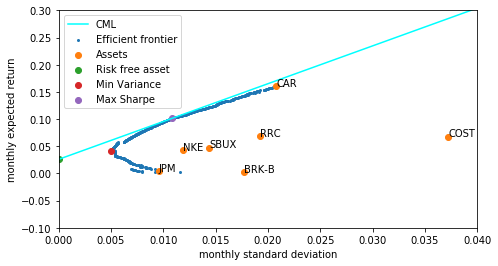

In [147]:
fig = plt.figure(figsize=(7.5, 4))
# Compute missing returns and stds.
asset_stds = np.sqrt(np.diag(cov_matrix_monthly))
portfolio_stds = [compute_portfolio_std(cov_matrix_monthly, weights) for weights in portfolio_weights]
portfolio_returns = [compute_portfolio_expected_return(exp_returns_monthly, weights) for weights in portfolio_weights]

# Plot Capital Market Line
x_range = np.linspace(0, 0.3)
plt.plot(x_range, risk_free_rate + max_sharpe_ratio * x_range , c='cyan', label="CML")

# Plot portfolios
plt.scatter(portfolio_stds, portfolio_returns, label='Efficient frontier', s=4)
plt.scatter(asset_stds, exp_returns_monthly, label='Assets')
plt.scatter([0],[risk_free_rate], label='Risk free asset')
plt.scatter([min_variance_std],[min_variance_expected_return], label='Min Variance')
plt.scatter([max_sharpe_std],[max_sharpe_expected_return], label='Max Sharpe')

plt.ylim([-0.1, 0.3])
plt.xlim([0, 0.04])

for i, txt in enumerate(tickers):
    plt.annotate(txt, (asset_std[i], exp_returns_monthly[i]))

plt.xlabel('monthly standard deviation')
plt.ylabel('monthly expected return')
plt.legend()

# Feb

In [148]:
FebPred = pred['2019-02-01':'2019-02-28']
FebPred

,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
time,,,,,,,
2019-02-01,80.055717,103.411586,65.549374,206.131869,9.727401,27.309783,215.380925
2019-02-04,79.811244,103.619841,65.636358,205.406283,9.353461,27.355144,215.750880
2019-02-05,79.736207,103.447239,65.778388,205.296968,9.101467,27.288353,216.637504
2019-02-06,79.791736,103.435086,65.817457,205.317158,8.927330,27.321408,216.611517
2019-02-07,79.851449,103.448215,65.895198,205.109543,8.773740,27.327329,216.633628
2019-02-08,80.216297,103.378089,65.829401,205.266326,9.194975,27.394058,216.625583
2019-02-11,80.637964,103.332205,65.883562,204.354481,9.315840,27.581724,216.557999
2019-02-12,80.702007,103.308518,66.598910,204.237334,9.556622,27.266036,216.531331
2019-02-13,80.965635,103.042476,66.854780,204.175448,9.370917,27.311299,216.703121


In [149]:
FebStart = Prices2019['2019-02-01':'2019-02-01']
FebEnd = Prices2019['2019-02-28':'2019-02-28']

In [150]:
daily_returns = FebPred.pct_change().dropna()

In [151]:
exp_returns_daily = compute_expected_daily_returns(daily_returns)
# convert average daily returns to annualized returns
exp_returns_monthly = np.power(1 + exp_returns_daily, 20) - 1

In [152]:
cov_daily = compute_daily_covariance_matrix(daily_returns)
cov_matrix_monthly = cov_daily * 20 # monthly: multiply with number of trading days in a month

In [153]:
print("Monthly Covariance Matrix")
print(' ' * 7, end="")   # 不换行输出
for tick in tickers:
    print("% 7s" % tick, end='')
print('\n', end="") #\n表示换行
print(' ' * 5, end="")
print('-' * 72)
for i, row_ticker in enumerate(tickers): #enumerate同时列出数据下标和数据
    print('%-4s | ' % row_ticker, end='')
    for j, col_ticker in enumerate(tickers):
        print("% 6.4f" % cov_matrix_monthly[i,j], end='')
    print('\n', end='')

Monthly Covariance Matrix
           NKE    JPM   SBUX  BRK-B    RRC    CAR   COST
     ------------------------------------------------------------------------
NKE  |  0.0001-0.0000 0.0000-0.0000 0.0004 0.0001-0.0000
JPM  | -0.0000 0.0000-0.0000-0.0000 0.0000 0.0000 0.0000
SBUX |  0.0000-0.0000 0.0004-0.0001 0.0001-0.0001 0.0000
BRK-B | -0.0000-0.0000-0.0001 0.0003 0.0001 0.0000 0.0001
RRC  |  0.0004 0.0000 0.0001 0.0001 0.0080 0.0000-0.0002
CAR  |  0.0001 0.0000-0.0001 0.0000 0.0000 0.0008-0.0000
COST | -0.0000 0.0000 0.0000 0.0001-0.0002-0.0000 0.0001


In [154]:
portfolio_weights = efficient_frontier(exp_returns_monthly, cov_matrix_monthly)

In [155]:
min_variance_weights = min_variance_portfolio(cov_matrix_monthly, portfolio_weights)
min_variance_expected_return = compute_portfolio_expected_return(exp_returns_monthly, min_variance_weights)
min_variance_std = compute_portfolio_std(cov_matrix_monthly, min_variance_weights)

In [156]:
for tick, x in zip(tickers, min_variance_weights):
    print('Weight %-4s %5.2f%%' % (tick, (x + 1e-10) * 100 ))

Weight NKE  18.82%
Weight JPM  17.95%
Weight SBUX 18.02%
Weight BRK-B 15.92%
Weight RRC   0.17%
Weight CAR  11.32%
Weight COST 17.78%


In [157]:
FebReturn = np.dot(FebEnd, (min_variance_weights/FebStart).T)
FebReturnRate = (FebReturn - 1)/1
print('Jan Return rate of min_variance: %5.2f%% ' % ((FebReturnRate + 1e-10) * 100) )

Jan Return rate of min_variance:  5.77% 


In [158]:
max_sharpe_ratio, max_sharpe_weights = max_sharpe_portfolio(exp_returns_monthly, cov_matrix_monthly, risk_free_rate, portfolio_weights)
max_sharpe_expected_return = compute_portfolio_expected_return(exp_returns_monthly, max_sharpe_weights)
max_sharpe_std = compute_portfolio_std(cov_matrix_monthly, max_sharpe_weights)

In [159]:
for tick, x in zip(tickers, max_sharpe_weights):
    print('Weight %-4s %5.2f%%' % (tick, (x + 1e-10) * 100 ))

Weight NKE  73.08%
Weight JPM   0.00%
Weight SBUX 25.62%
Weight BRK-B  0.00%
Weight RRC   0.00%
Weight CAR   0.00%
Weight COST  1.31%


In [160]:
FebReturn = np.dot(FebEnd,(max_sharpe_weights/FebStart).T)
FebReturnRate = (FebReturn - 1)/1
print('Jan Return rate of max_sharpe: %5.2f%% ' % ((FebReturnRate + 1e-10) * 100) )

Jan Return rate of max_sharpe:  4.79% 


# Mar

In [161]:
MarPred = pred['2019-03-01':'2019-03-29']
MarPred

,NKE,JPM,SBUX,BRK-B,RRC,CAR,COST
time,,,,,,,
2019-03-01,86.632012,104.157897,71.320529,201.424388,10.836792,33.982663,218.283272
2019-03-04,86.803491,104.239298,71.327771,200.249975,10.887658,34.008138,217.867454
2019-03-05,86.954376,104.154801,71.247747,200.447106,10.918082,33.570959,217.718393
2019-03-06,86.985984,104.113510,71.456137,200.625913,10.965113,33.960511,217.504371
2019-03-07,86.836379,103.997264,71.522810,201.179224,10.958166,33.881739,217.480872
2019-03-08,86.766378,103.708367,71.532104,203.345213,10.889732,33.835035,217.941180
2019-03-11,86.683230,103.950172,71.492005,201.943464,10.507688,33.635908,217.981586
2019-03-12,86.593066,103.958921,71.354987,202.326593,10.561397,32.839349,218.257303
2019-03-13,86.673306,103.375440,71.132015,202.427023,10.586129,32.860636,218.490904


In [162]:
MarStart = Prices2019['2019-03-01':'2019-03-01']
MarEnd = Prices2019['2019-03-29':'2019-03-29']

In [163]:
daily_returns = MarPred.pct_change().dropna()

In [164]:
exp_returns_daily = compute_expected_daily_returns(daily_returns)
# convert average daily returns to annualized returns
exp_returns_monthly = np.power(1 + exp_returns_daily, 20) - 1

In [165]:
cov_daily = compute_daily_covariance_matrix(daily_returns)
cov_matrix_monthly = cov_daily * 20 # monthly: multiply with number of trading days in a month

In [166]:
print("Monthly Covariance Matrix")
print(' ' * 7, end="")   # 不换行输出
for tick in tickers:
    print("% 7s" % tick, end='')
print('\n', end="") #\n表示换行
print(' ' * 5, end="")
print('-' * 72)
for i, row_ticker in enumerate(tickers): #enumerate同时列出数据下标和数据
    print('%-4s | ' % row_ticker, end='')
    for j, col_ticker in enumerate(tickers):
        print("% 6.4f" % cov_matrix_monthly[i,j], end='')
    print('\n', end='')

Monthly Covariance Matrix
           NKE    JPM   SBUX  BRK-B    RRC    CAR   COST
     ------------------------------------------------------------------------
NKE  |  0.0001-0.0000-0.0000-0.0001 0.0000-0.0002 0.0000
JPM  | -0.0000 0.0001-0.0000-0.0001-0.0001 0.0002 0.0000
SBUX | -0.0000-0.0000 0.0001 0.0000 0.0000 0.0001-0.0000
BRK-B | -0.0001-0.0001 0.0000 0.0003 0.0002 0.0000 0.0000
RRC  |  0.0000-0.0001 0.0000 0.0002 0.0022 0.0003 0.0000
CAR  | -0.0002 0.0002 0.0001 0.0000 0.0003 0.0025 0.0000
COST |  0.0000 0.0000-0.0000 0.0000 0.0000 0.0000 0.0001


In [167]:
portfolio_weights = efficient_frontier(exp_returns_monthly, cov_matrix_monthly)

In [176]:
min_variance_weights = min_variance_portfolio(cov_matrix_monthly, portfolio_weights)
min_variance_expected_return = compute_portfolio_expected_return(exp_returns_monthly, min_variance_weights)
min_variance_std = compute_portfolio_std(cov_matrix_monthly, min_variance_weights)

In [177]:
for tick, x in zip(tickers, min_variance_weights):
    print('Weight %-4s %5.2f%%' % (tick, (x + 1e-10) * 100 ))

Weight NKE  32.69%
Weight JPM  27.64%
Weight SBUX 19.01%
Weight BRK-B 13.04%
Weight RRC   0.01%
Weight CAR  -0.02%
Weight COST  7.63%


In [178]:
MarReturn = np.dot(MarEnd, (min_variance_weights/MarStart).T)
MarReturnRate = (MarReturn - 1)/1
print('Mar Return rate of min_variance: %5.2f%% ' % ((MarReturnRate + 1e-10) * 100) )

Mar Return rate of min_variance: -0.37% 


In [179]:
max_sharpe_ratio, max_sharpe_weights = max_sharpe_portfolio(exp_returns_monthly, cov_matrix_monthly, risk_free_rate, portfolio_weights)
max_sharpe_expected_return = compute_portfolio_expected_return(exp_returns_monthly, max_sharpe_weights)
max_sharpe_std = compute_portfolio_std(cov_matrix_monthly, max_sharpe_weights)

In [180]:
for tick, x in zip(tickers, max_sharpe_weights):
    print('Weight %-4s %5.2f%%' % (tick, (x + 1e-10) * 100 ))

Weight NKE   0.04%
Weight JPM   0.01%
Weight SBUX -0.04%
Weight BRK-B -0.04%
Weight RRC  -0.01%
Weight CAR  99.99%
Weight COST  0.02%


In [181]:
MarReturn = np.dot(MarEnd,(max_sharpe_weights/MarStart).T)
MarReturnRate = (MarReturn - 1)/1
print('Mar Return rate of max_sharpe: %5.2f%% ' % ((MarReturnRate + 1e-10) * 100) )

Mar Return rate of max_sharpe: -3.95% 


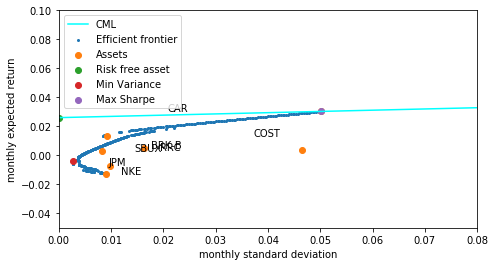

In [175]:
fig = plt.figure(figsize=(7.5, 4))
# Compute missing returns and stds.
asset_stds = np.sqrt(np.diag(cov_matrix_monthly))
portfolio_stds = [compute_portfolio_std(cov_matrix_monthly, weights) for weights in portfolio_weights]
portfolio_returns = [compute_portfolio_expected_return(exp_returns_monthly, weights) for weights in portfolio_weights]

# Plot Capital Market Line
x_range = np.linspace(0, 0.3)
plt.plot(x_range, risk_free_rate + max_sharpe_ratio * x_range , c='cyan', label="CML")

# Plot portfolios
plt.scatter(portfolio_stds, portfolio_returns, label='Efficient frontier', s=4)
plt.scatter(asset_stds, exp_returns_monthly, label='Assets')
plt.scatter([0],[risk_free_rate], label='Risk free asset')
plt.scatter([min_variance_std],[min_variance_expected_return], label='Min Variance')
plt.scatter([max_sharpe_std],[max_sharpe_expected_return], label='Max Sharpe')

plt.ylim([-0.05, 0.1])
plt.xlim([0, 0.08])

for i, txt in enumerate(tickers):
    plt.annotate(txt, (asset_std[i], exp_returns_monthly[i]))

plt.xlabel('monthly standard deviation')
plt.ylabel('monthly expected return')
plt.legend()